<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/0405_dfs_adjacency_list.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def dfs(G, s):
  n = len(G)
  path = [-1]*n
  visited = [False]*n

  def _dfs(u):
    visited[u] = True
    for v in G[u]:
      if not visited[v]:
        path[v] = u
        _dfs(v)

  _dfs(s)
  return path

In [ ]:
%%file 0405a.al
1 4
0 3 5 6
4 5 6
1 7
0 2 6 7
1 2
1 2 4
3 4

Writing 0405a.al


In [ ]:
G1 = []
with open("0405a.al") as f:
  for line in f:
    if line == "-\n":
      G1.append([])
    else:
      G1.append([int(x) for x in line.split()])

print(G1)

[[1, 4], [0, 3, 5, 6], [4, 5, 6], [1, 7], [0, 2, 6, 7], [1, 2], [1, 2, 4], [3, 4]]


In [ ]:
path = dfs(G1, 5)
path

[1, 5, 4, 7, 0, -1, 2, 4]

In [ ]:
def drawG_al(G, directed=False, path=[]):
  graph = gv.Digraph("felicidad") if directed else gv.Graph("alegria")
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v in G[u]:
      if not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        graph.edge(str(u), str(v))
      elif directed:
        graph.edge(str(u), str(v))
  return graph

In [ ]:
import graphviz as gv

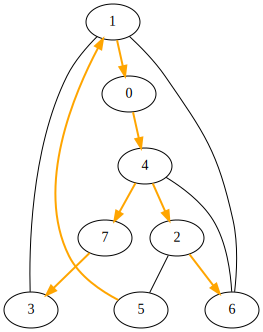

In [ ]:
drawG_al(G1, path=path)